In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
transaction = pd.read_csv('transactions_train.csv')
customers = pd.read_csv('customers.csv')

In [3]:
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


In [5]:
customers.describe()

,FN,Active,age
count,476930.0,464404.0,1.356119e+06
mean,1.0,1.0,3.638696e+01
std,0.0,0.0,1.431363e+01
min,1.0,1.0,1.600000e+01
25%,1.0,1.0,2.400000e+01
50%,1.0,1.0,3.200000e+01
75%,1.0,1.0,4.900000e+01
max,1.0,1.0,9.900000e+01


In [7]:
customers.nunique()

customer_id               1371980
FN                              1
Active                          1
club_member_status              3
fashion_news_frequency          4
age                            84
postal_code                352899
dtype: int64

In [8]:
#Unique values in each column
for c in customers.columns:
    print("{} ({}) {} => {}".format(c, customers[c].nunique(), type(customers[c].iloc[0]), customers[c].unique()))

customer_id (1371980) <class 'str'> => ['00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657'
 '0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa'
 '000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318' ...
 'ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1778d0116cffd259264'
 'ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38b2236865d949d4df6a'
 'ffffd9ac14e89946416d80e791d064701994755c3ab686a1eaf3458c36f52241']
FN (1) <class 'numpy.float64'> => [nan  1.]
Active (1) <class 'numpy.float64'> => [nan  1.]
club_member_status (3) <class 'str'> => ['ACTIVE' nan 'PRE-CREATE' 'LEFT CLUB']
fashion_news_frequency (4) <class 'str'> => ['NONE' 'Regularly' nan 'Monthly' 'None']
age (84) <class 'numpy.float64'> => [49. 25. 24. 54. 52. nan 20. 32. 29. 31. 56. 75. 41. 27. 30. 48. 35. 22.
 40. 38. 45. 68. 55. 19. 60. 44. 21. 26. 28. 53. 33. 17. 23. 51. 18. 34.
 57. 47. 70. 50. 63. 58. 43. 67. 72. 42. 39. 79. 71. 59. 36. 62. 37. 46.
 73. 64. 74. 61. 85. 69. 76. 66. 65

In [9]:
for c in ['FN','Active','club_member_status', 'fashion_news_frequency']:
    print('[{}] :\n{}\n'.format(c, customers[c].value_counts(dropna=False)))

[FN] :
NaN    895050
1.0    476930
Name: FN, dtype: int64

[Active] :
NaN    907576
1.0    464404
Name: Active, dtype: int64

[club_member_status] :
ACTIVE        1272491
PRE-CREATE      92960
NaN              6062
LEFT CLUB         467
Name: club_member_status, dtype: int64

[fashion_news_frequency] :
NONE         877711
Regularly    477416
NaN           16009
Monthly         842
None              2
Name: fashion_news_frequency, dtype: int64



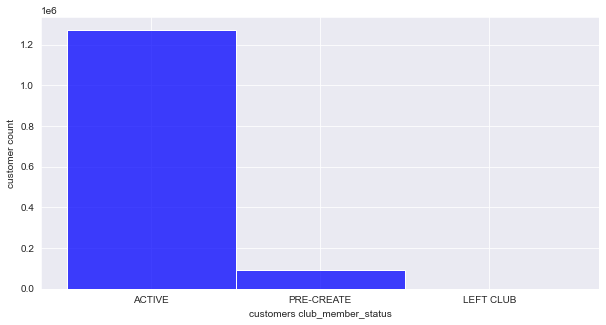

In [10]:
# club_member_status
sns.set_style("darkgrid")
figure, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=customers, x='club_member_status', color='blue')
ax.set_xlabel('customers club_member_status')
ax.set_ylabel('customer count')
plt.show()

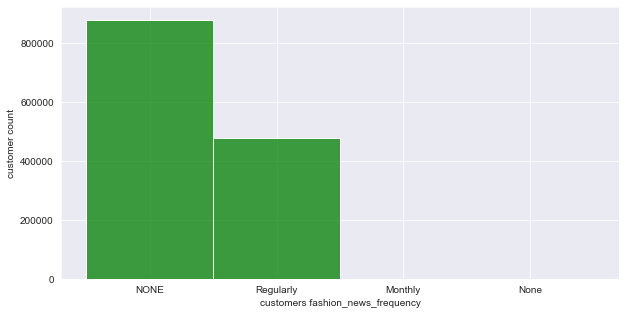

In [11]:
# fashion_news_frequency
sns.set_style("darkgrid")
figure, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=customers, x='fashion_news_frequency', color='')
ax.set_xlabel('customers fashion_news_frequency')
ax.set_ylabel('customer count')
plt.show()

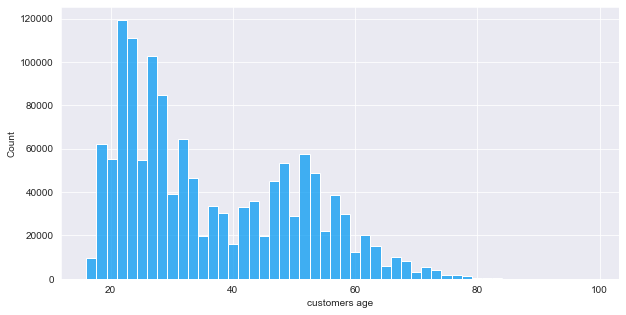

In [12]:
# age
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style("darkgrid")
figure, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=customers, x='age', bins=50, color='xkcd:azure')
ax.set_xlabel('customers age')
plt.show()

In [13]:
# average description
customers['age'].describe()

count    1.356119e+06
mean     3.638696e+01
std      1.431363e+01
min      1.600000e+01
25%      2.400000e+01
50%      3.200000e+01
75%      4.900000e+01
max      9.900000e+01
Name: age, dtype: float64

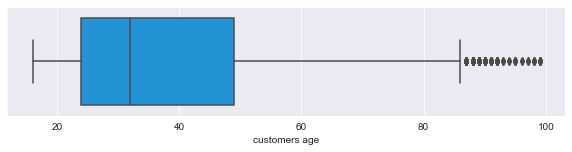

In [17]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style("darkgrid")
figure, ax = plt.subplots(figsize=(10,2))
ax = sns.boxplot(data=customers, x='age', color='xkcd:azure')
ax.set_xlabel('customers age')
plt.show()

In [18]:
# age description with ACTIVE club_member_status
customers[customers['club_member_status']== 'ACTIVE']['age'].describe()

count    1.266255e+06
mean     3.607799e+01
std      1.430526e+01
min      1.600000e+01
25%      2.400000e+01
50%      3.100000e+01
75%      4.800000e+01
max      9.900000e+01
Name: age, dtype: float64

In [19]:
# age description who fashion_news_frequency is 'Regularly'
customers[customers['fashion_news_frequency']== 'Regularly']['age'].describe()

count    476211.000000
mean         37.030680
std          14.881801
min          16.000000
25%          24.000000
50%          32.000000
75%          50.000000
max          99.000000
Name: age, dtype: float64

In [20]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB


In [21]:
pd.set_option('display.float_format', '{:.4f}'.format)
transaction.describe()

,article_id,price,sales_channel_id
count,31788324.0000,31788324.0000,31788324.0000
mean,696227219.0051,0.0278,1.7040
std,133448003.4874,0.0192,0.4565
min,108775015.0000,0.0000,1.0000
25%,632803008.0000,0.0158,1.0000
50%,714582003.0000,0.0254,2.0000
75%,786524001.0000,0.0339,2.0000
max,956217002.0000,0.5915,2.0000


In [22]:
transaction.nunique()

t_dat                   734
customer_id         1362281
article_id           104547
price                  9857
sales_channel_id          2
dtype: int64

In [23]:
# price
pd.set_option('display.float_format', '{:.4f}'.format)
transaction.describe()['price']

count   31788324.0000
mean           0.0278
std            0.0192
min            0.0000
25%            0.0158
50%            0.0254
75%            0.0339
max            0.5915
Name: price, dtype: float64

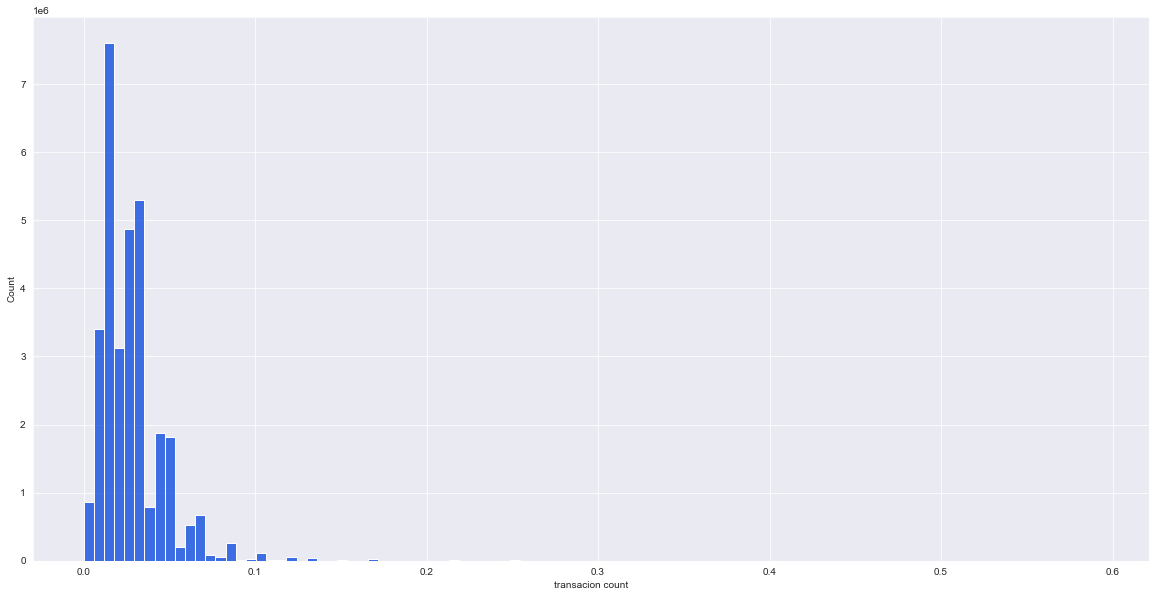

In [30]:
# Price Distribution 
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style("darkgrid")
figure, ax = plt.subplots(figsize=(20, 10))
ax = sns.histplot(data=transaction, x='price', bins=100, color='xkcd:blue')
ax.set_xlabel('price')
ax.set_xlabel('transacion count')
plt.show()

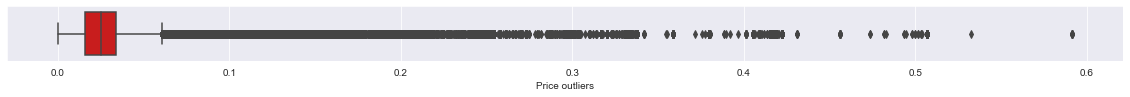

In [33]:
#Checking Price Outliers
sns.set_style("darkgrid")
figure, ax = plt.subplots(figsize=(20,1))
ax = sns.boxplot(data=transaction, x='price', color='xkcd:red')
ax.set_xlabel('Price outliers')
plt.show()